In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [33]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [34]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=84028217aa00b76299c46fc9743a6989


In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | zhigansk
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | mattru
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | channel-port aux basques
Processing Record 8 of Set 1 | safwah
City not found. Skipping...
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | saint-joseph
Processing Record 16 of Set 1 | lakes entrance
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | yellowknife
Processing Record 2

Processing Record 38 of Set 4 | sehithwa
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | jieshi
Processing Record 41 of Set 4 | billings
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | warqla
City not found. Skipping...
Processing Record 44 of Set 4 | kaitangata
Processing Record 45 of Set 4 | rawson
Processing Record 46 of Set 4 | okhotsk
Processing Record 47 of Set 4 | gwanda
Processing Record 48 of Set 4 | cazaje
City not found. Skipping...
Processing Record 49 of Set 4 | isla mujeres
Processing Record 50 of Set 4 | gorontalo
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | neuquen
Processing Record 7 of Set 5 | bratsk
Processing Record 8 of Set 5 | san andres
Processing Record 9 of Set 5 | sakiai
Processing Record 

Processing Record 25 of Set 8 | sheltozero
Processing Record 26 of Set 8 | banda aceh
Processing Record 27 of Set 8 | lewistown
Processing Record 28 of Set 8 | chachapoyas
Processing Record 29 of Set 8 | mangan
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | makushino
Processing Record 32 of Set 8 | vodnyy
Processing Record 33 of Set 8 | omboue
Processing Record 34 of Set 8 | veinticinco de mayo
Processing Record 35 of Set 8 | milton
Processing Record 36 of Set 8 | marawi
Processing Record 37 of Set 8 | beruni
City not found. Skipping...
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | pinahat
Processing Record 40 of Set 8 | mucurici
Processing Record 41 of Set 8 | gamba
Processing Record 42 of Set 8 | edelira
Processing Record 43 of Set 8 | juneau
Processing Record 44 of Set 8 | tshela
Processing Record 45 of Set 8 | afmadu
City not found. Skipping...
Processing Record 46 of Set 8 | eureka
Processing Record 47 of Set 8 | namibe
Processin

Processing Record 13 of Set 12 | sioux lookout
Processing Record 14 of Set 12 | luwuk
Processing Record 15 of Set 12 | snasa
Processing Record 16 of Set 12 | dunedin
Processing Record 17 of Set 12 | chernyshevskiy
Processing Record 18 of Set 12 | poya
Processing Record 19 of Set 12 | aitape
Processing Record 20 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 21 of Set 12 | bangkok
Processing Record 22 of Set 12 | yenagoa
Processing Record 23 of Set 12 | nouadhibou
Processing Record 24 of Set 12 | opuwo
Processing Record 25 of Set 12 | tacoronte
Processing Record 26 of Set 12 | maralal
Processing Record 27 of Set 12 | naze
Processing Record 28 of Set 12 | flinders
Processing Record 29 of Set 12 | portland
Processing Record 30 of Set 12 | umuahia
Processing Record 31 of Set 12 | hirado
Processing Record 32 of Set 12 | suchiapa
Processing Record 33 of Set 12 | kribi
Processing Record 34 of Set 12 | aloleng
Processing Record 35 of Set 12 | attawapiskat
City not

In [38]:
len(city_data)

579

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,71.01,67,19,4.70,PF,2021-07-25 21:50:09
1,Mar Del Plata,-38.0023,-57.5575,52.09,60,90,7.00,AR,2021-07-25 21:51:37
2,Zhigansk,66.7697,123.3711,62.74,63,29,9.22,RU,2021-07-25 21:51:38
3,Saskylakh,71.9167,114.0833,56.30,66,92,14.63,RU,2021-07-25 21:51:38
4,Mattru,7.6244,-11.8332,72.01,96,97,1.81,SL,2021-07-25 21:51:38
5,Narsaq,60.9167,-46.0500,50.47,58,28,1.59,GL,2021-07-25 21:50:28
6,Channel-Port Aux Basques,47.5702,-59.1367,58.71,81,14,7.99,CA,2021-07-25 21:51:39
7,Ushuaia,-54.8000,-68.3000,35.26,87,40,26.46,AR,2021-07-25 21:49:56
8,Souillac,-20.5167,57.5167,70.18,60,20,8.05,MU,2021-07-25 21:50:16
9,Albany,42.6001,-73.9662,83.84,84,36,3.98,US,2021-07-25 21:51:39


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-25 21:50:09,-23.1203,-134.9692,71.01,67,19,4.70
1,Mar Del Plata,AR,2021-07-25 21:51:37,-38.0023,-57.5575,52.09,60,90,7.00
2,Zhigansk,RU,2021-07-25 21:51:38,66.7697,123.3711,62.74,63,29,9.22
3,Saskylakh,RU,2021-07-25 21:51:38,71.9167,114.0833,56.30,66,92,14.63
4,Mattru,SL,2021-07-25 21:51:38,7.6244,-11.8332,72.01,96,97,1.81
5,Narsaq,GL,2021-07-25 21:50:28,60.9167,-46.0500,50.47,58,28,1.59
6,Channel-Port Aux Basques,CA,2021-07-25 21:51:39,47.5702,-59.1367,58.71,81,14,7.99
7,Ushuaia,AR,2021-07-25 21:49:56,-54.8000,-68.3000,35.26,87,40,26.46
8,Souillac,MU,2021-07-25 21:50:16,-20.5167,57.5167,70.18,60,20,8.05
9,Albany,US,2021-07-25 21:51:39,42.6001,-73.9662,83.84,84,36,3.98


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

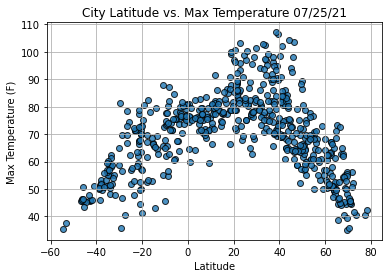

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

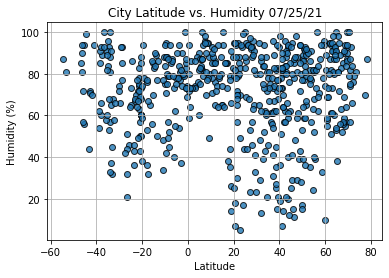

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

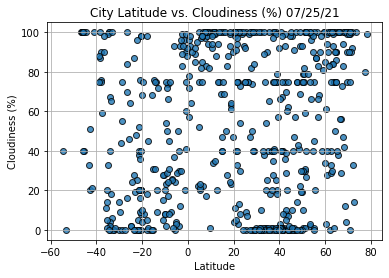

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

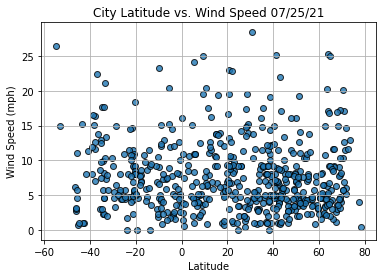

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13 = city_data_df.loc[13]
index13

City               Lakes Entrance
Country                        AU
Date          2021-07-25 21:51:40
Lat                      -37.8811
Lng                       147.981
Max Temp                    53.19
Humidity                       66
Cloudiness                     76
Wind Speed                  11.65
Name: 13, dtype: object

In [50]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
574    False
575     True
576     True
577    False
578     True
Name: Lat, Length: 579, dtype: bool

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Zhigansk,RU,2021-07-25 21:51:38,66.7697,123.3711,62.74,63,29,9.22
3,Saskylakh,RU,2021-07-25 21:51:38,71.9167,114.0833,56.30,66,92,14.63
4,Mattru,SL,2021-07-25 21:51:38,7.6244,-11.8332,72.01,96,97,1.81
5,Narsaq,GL,2021-07-25 21:50:28,60.9167,-46.0500,50.47,58,28,1.59
6,Channel-Port Aux Basques,CA,2021-07-25 21:51:39,47.5702,-59.1367,58.71,81,14,7.99
...,...,...,...,...,...,...,...,...,...
572,Weligama,LK,2021-07-25 21:54:03,5.9667,80.4167,77.45,87,98,10.98
573,Cardston,CA,2021-07-25 21:54:03,49.2000,-113.3019,88.09,28,19,3.44
575,Birobidzhan,RU,2021-07-25 21:54:03,48.8000,132.9500,72.23,94,100,4.43
576,Ponta Delgada,PT,2021-07-25 21:54:04,37.7333,-25.6667,70.52,83,75,9.22


In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Zhigansk,RU,2021-07-25 21:51:38,66.7697,123.3711,62.74,63,29,9.22
3,Saskylakh,RU,2021-07-25 21:51:38,71.9167,114.0833,56.30,66,92,14.63
4,Mattru,SL,2021-07-25 21:51:38,7.6244,-11.8332,72.01,96,97,1.81
5,Narsaq,GL,2021-07-25 21:50:28,60.9167,-46.0500,50.47,58,28,1.59
6,Channel-Port Aux Basques,CA,2021-07-25 21:51:39,47.5702,-59.1367,58.71,81,14,7.99


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

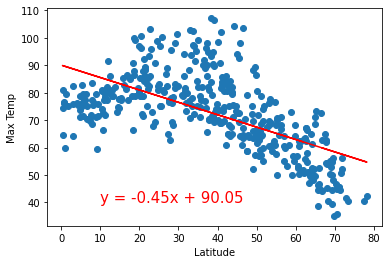

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

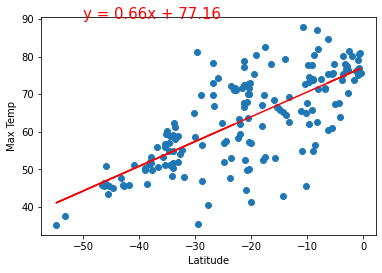

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

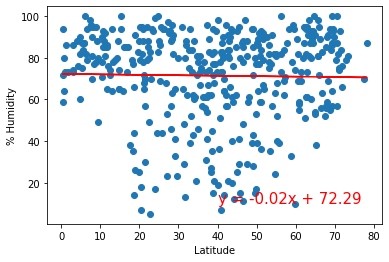

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

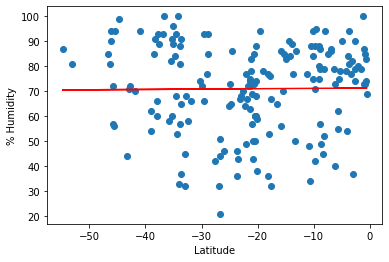

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

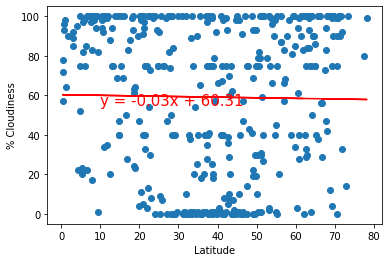

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

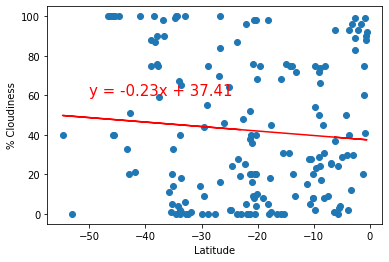

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

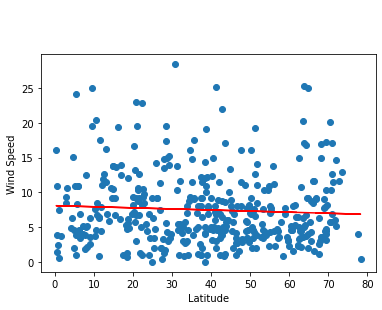

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

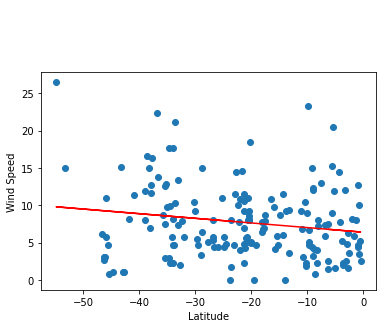

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))